# Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

Data Dictionary

1. Carat - Carat weight of the cubic zirconia.
2. Cut - Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
3. Color - Colour of the cubic zirconia.With D being the worst and J the best.
4. Clarity - Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
5. Depth - The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
6. Table - The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
7. Price - the Price of the cubic zirconia.
8. X - Length of the cubic zirconia in mm.
9. Y - Width of the cubic zirconia in mm.
10. Z - Height of the cubic zirconia in mm.

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv('cubic_zirconia.csv')

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

### EDA

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
# drop the Unnamed:0 column as it is useless for the model
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [8]:
df.shape

(26967, 10)

In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [10]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 10)
After (26933, 10)


In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [12]:
# getting unique values for categorical variables

for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [13]:
# Are there any missing values ?
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

### Univariate analysis

Text(0.5, 1.0, 'x Distribution')

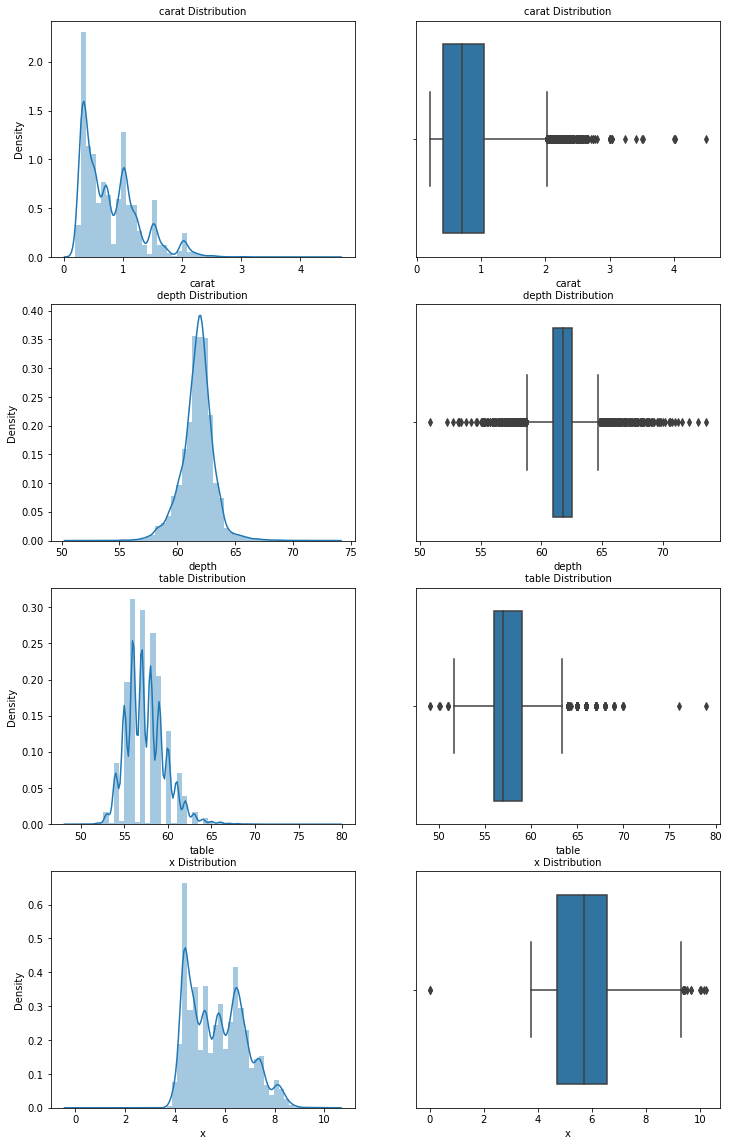

In [14]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)

a = sns.distplot(df['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=10)
a = sns.boxplot(df['carat'] , orient = "v" , ax=axes[0][1])
a.set_title("carat Distribution",fontsize=10)

a = sns.distplot(df['depth'] , ax=axes[1][0])
a.set_title("depth Distribution",fontsize=10)
a = sns.boxplot(df['depth'] , orient = "v" , ax=axes[1][1])
a.set_title("depth Distribution",fontsize=10)

a = sns.distplot(df['table'] , ax=axes[2][0])
a.set_title("table Distribution",fontsize=10)
a = sns.boxplot(df['table'] , orient = "v" , ax=axes[2][1])
a.set_title("table Distribution",fontsize=10)

a = sns.distplot(df['x'] , ax=axes[3][0])
a.set_title("x Distribution",fontsize=10)
a = sns.boxplot(df['x'] , orient = "v" , ax=axes[3][1])
a.set_title("x Distribution",fontsize=10)

Text(0.5, 1.0, 'price Distribution')

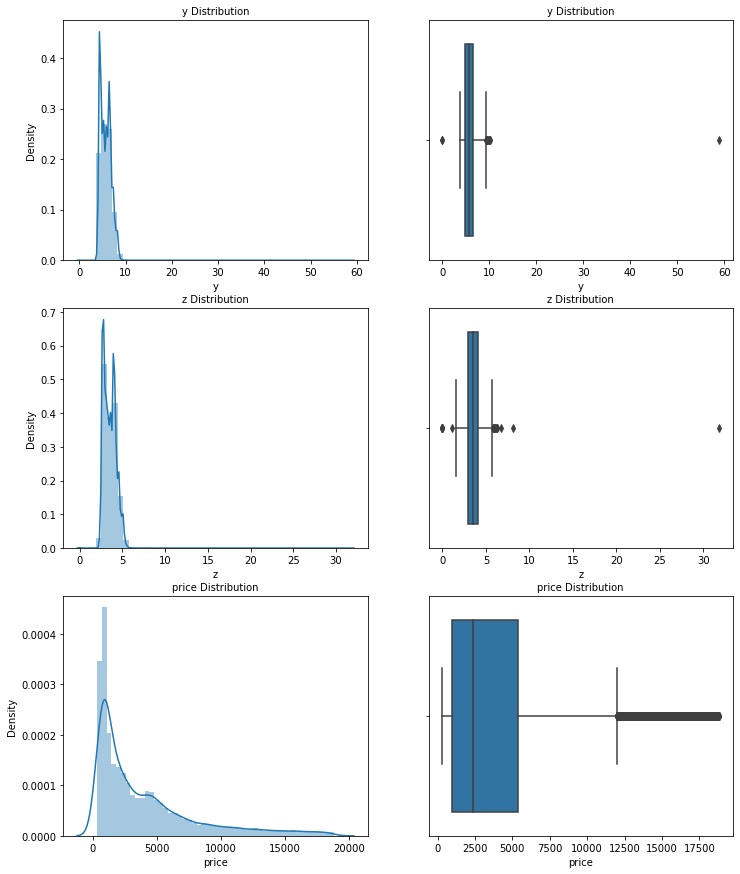

In [15]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 15)

a = sns.distplot(df['y'] , ax=axes[0][0])
a.set_title("y Distribution",fontsize=10)
a = sns.boxplot(df['y'] , orient = "v" , ax=axes[0][1])
a.set_title("y Distribution",fontsize=10)

a = sns.distplot(df['z'] , ax=axes[1][0])
a.set_title("z Distribution",fontsize=10)
a = sns.boxplot(df['z'] , orient = "v" , ax=axes[1][1])
a.set_title("z Distribution",fontsize=10)

a = sns.distplot(df['price'] , ax=axes[2][0])
a.set_title("price Distribution",fontsize=10)
a = sns.boxplot(df['price'] , orient = "v" , ax=axes[2][1])
a.set_title("price Distribution",fontsize=10)

### Bivariate Analysis

<AxesSubplot:xlabel='cut', ylabel='count'>

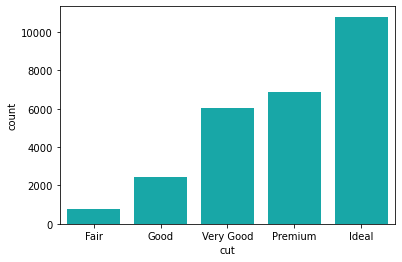

In [16]:
sns.countplot(x='cut',data=df,color='c',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

<AxesSubplot:xlabel='cut', ylabel='price'>

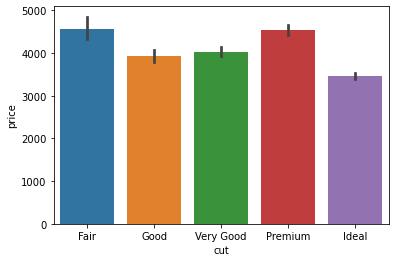

In [17]:
sns.barplot(data = df, x='cut',y='price',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

<AxesSubplot:xlabel='color', ylabel='count'>

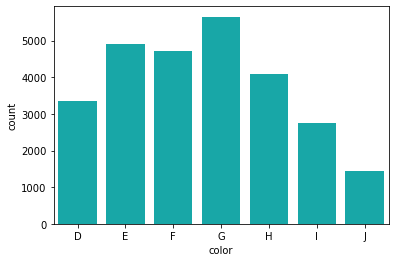

In [18]:
sns.countplot(x='color',data=df,color='c',order = ['D', 'E', 'F', 'G','H', 'I', 'J'])

<AxesSubplot:xlabel='color', ylabel='price'>

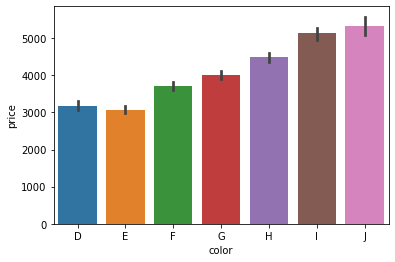

In [19]:
sns.barplot(data = df, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] )

<AxesSubplot:xlabel='clarity', ylabel='count'>

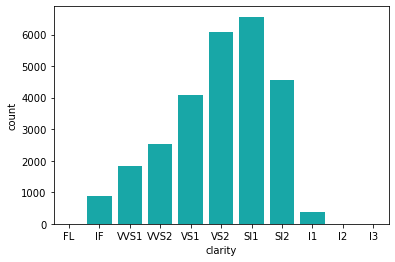

In [20]:
sns.countplot(x='clarity',data=df,color='c',order =['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

<AxesSubplot:xlabel='clarity', ylabel='price'>

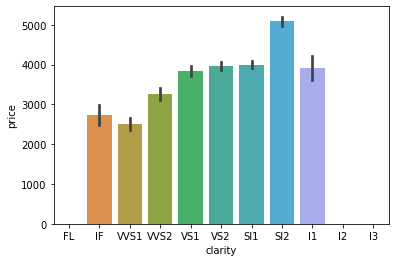

In [21]:
sns.barplot(data = df, x='clarity',y='price', order =['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

In [22]:
df.skew()

carat    1.114789
depth   -0.026086
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64

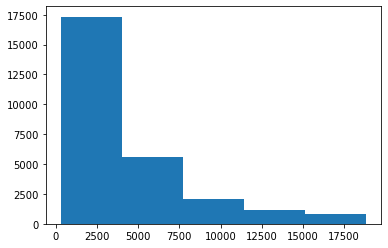

In [23]:
plt.hist(df.price, bins = 5)
plt.show()

### Multivariate Analysis

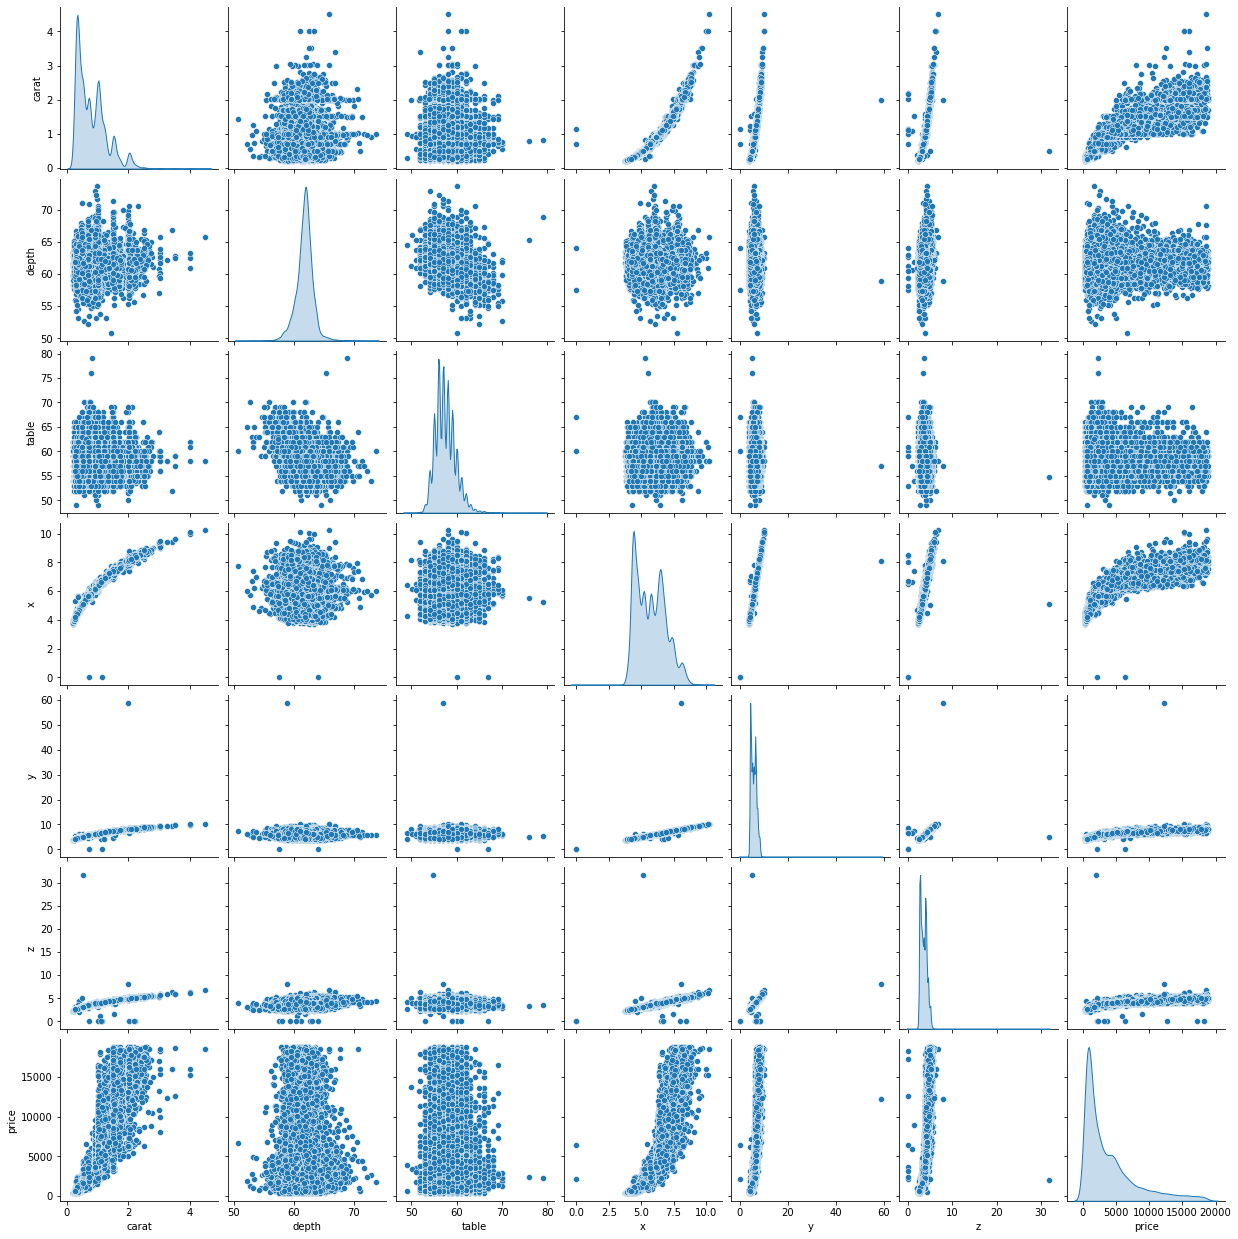

In [24]:
sns.pairplot(df, diag_kind='kde')  
plt.show()

In [25]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


<AxesSubplot:>

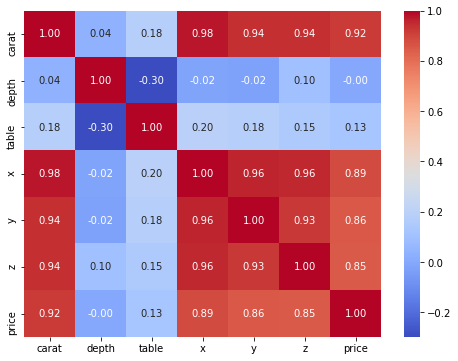

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt = '.2f', cmap='coolwarm')

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

### Imputing missing values

In [27]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].mean()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum() 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [28]:
df.isin([0]).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          2
y          2
z          8
price      0
dtype: int64

In [29]:
# Checking for the values which are equal to zero.
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df.depth==0).sum()))

Number of rows with x == 0: 2 
Number of rows with y == 0: 2 
Number of rows with z == 0: 8 
Number of rows with depth == 0: 0 


In [30]:
df.shape

(26933, 10)

In [31]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(26925, 10)

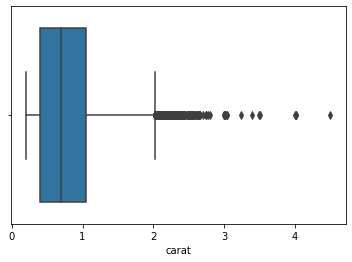

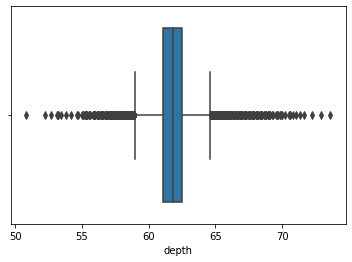

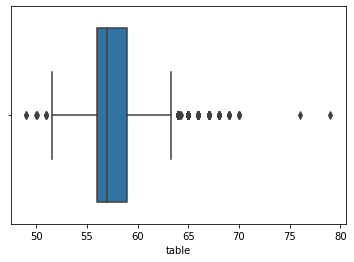

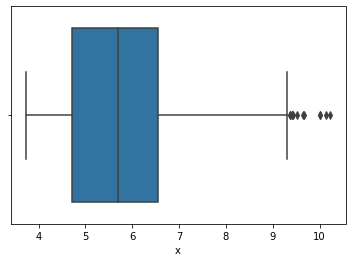

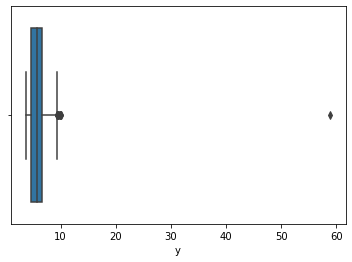

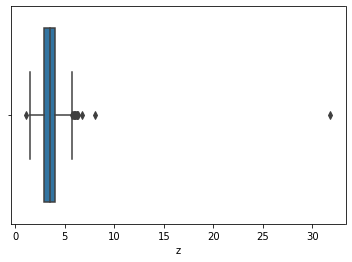

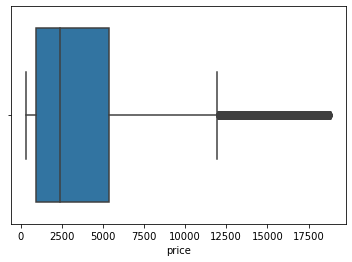

In [32]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z','price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [34]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index

In [35]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

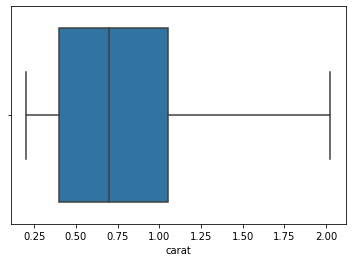

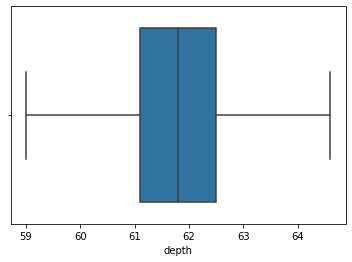

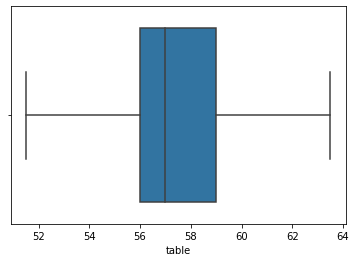

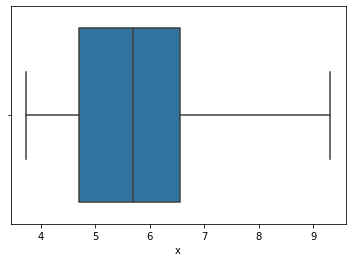

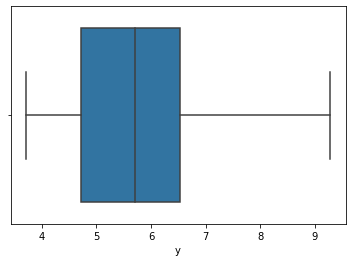

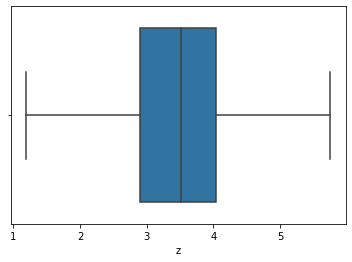

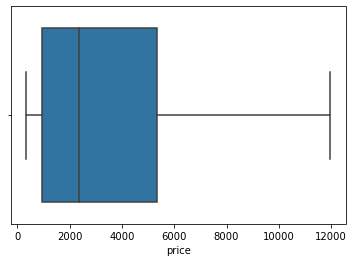

In [36]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z','price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

<AxesSubplot:>

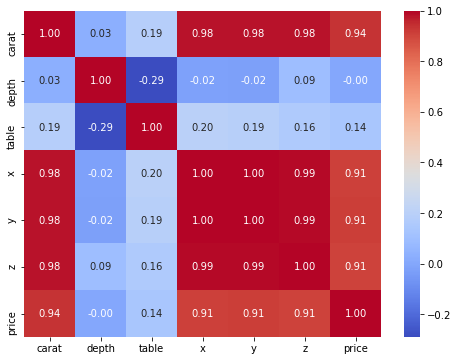

In [37]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [38]:
df=pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

In [39]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
df.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [41]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [42]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [44]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coefficient for carat is 9200.336626821452
The coefficient for depth is 12.387011169528243
The coefficient for table is -23.084292139929147
The coefficient for x is -1177.386315902881
The coefficient for y is 1082.334770273933
The coefficient for z is -640.4608264842923
The coefficient for cut_Good is 387.2987476028405
The coefficient for cut_Ideal is 629.885895765217
The coefficient for cut_Premium is 598.6725825645057
The coefficient for cut_Very Good is 502.3926994458831
The coefficient for color_E is -188.87576585385102
The coefficient for color_F is -231.23337497096466
The coefficient for color_G is -411.08186615575767
The coefficient for color_H is -831.5176210701064
The coefficient for color_I is -1330.1184456500273
The coefficient for color_J is -1861.6106446760089
The coefficient for clarity_IF is 3995.2161849354925
The coefficient for clarity_SI1 is 2535.907424016438
The coefficient for clarity_SI2 is 1712.1729307119317
The coefficient for clarity_VS1 is 3355.118566872268

In [46]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3079.940859717742


In [47]:
# R square on training data
regression_model.score(X_train,y_train)

0.9404719027464119

In [48]:
# R square on testing data
regression_model.score(X_test,y_test)

0.9416169664411843

In [49]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

843.7556057121485

In [50]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

838.4582658551066

### Check Multi-collinearity using VIF

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [53]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 124.38697910236743
depth ---> 1408.1065778484779
table ---> 1002.7510422325473
x ---> 11995.43695408838
y ---> 11519.97661050614
z ---> 3445.225348927899
cut_Good ---> 4.5042037429955935
cut_Ideal ---> 18.175107078573742
cut_Premium ---> 10.876252533152082
cut_Very Good ---> 10.068095194720607
color_E ---> 2.48083601777728


### Linear Regression using statsmodels

In [54]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
5030,1.10,63.3,56.0,6.53,6.58,4.15,1,0,0,0,...,0,0,0,0,1,0,0,0,0,4065.0
12108,1.01,64.0,56.0,6.30,6.38,4.06,0,0,0,1,...,0,0,0,0,1,0,0,0,0,5166.0
20181,0.67,60.7,61.4,5.60,5.64,3.41,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1708.0
4712,0.76,59.0,63.0,6.05,5.97,3.47,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2447.0
2548,1.01,62.8,59.0,6.37,6.34,3.99,0,0,1,0,...,0,0,0,0,0,1,0,0,0,6618.0


In [55]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)
data_test.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [56]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [57]:
expr = 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [58]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula = expr , data = data_train).fit()
lm1.params

Intercept       -3079.940860
carat            9200.336627
depth              12.387011
table             -23.084292
x               -1177.386316
y                1082.334770
z                -640.460826
cut_Good          387.298748
cut_Ideal         629.885896
cut_Premium       598.672583
cut_Very_Good     502.392699
color_E          -188.875766
color_F          -231.233375
color_G          -411.081866
color_H          -831.517621
color_I         -1330.118446
color_J         -1861.610645
clarity_IF       3995.216185
clarity_SI1      2535.907424
clarity_SI2      1712.172931
clarity_VS1      3355.118567
clarity_VS2      3072.161616
clarity_VVS1     3776.896113
clarity_VVS2     3766.786946
dtype: float64

In [59]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.293e+04
Date:                Fri, 15 Jul 2022   Prob (F-statistic):               0.00
Time:                        03:16:09   Log-Likelihood:            -1.5373e+05
No. Observations:               18847   AIC:                         3.075e+05
Df Residuals:                   18823   BIC:                         3.077e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3079.9409    749.396     -4.110

In [60]:
# Calculate MSE
mse=np.mean((lm1.predict(data_train.drop('price', axis=1)) - data_train['price'])**2)

In [61]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

843.7556057121502

In [62]:
np.sqrt(lm1.mse_resid) #another way

844.2933436852933

In [63]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

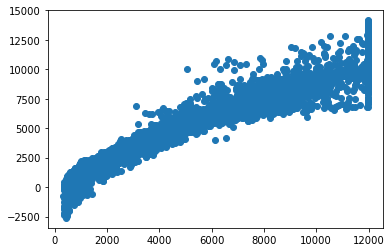

In [64]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [65]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3079.94) * Intercept + (9200.34) * carat + (12.39) * depth + (-23.08) * table + (-1177.39) * x + (1082.33) * y + (-640.46) * z + (387.3) * cut_Good + (629.89) * cut_Ideal + (598.67) * cut_Premium + (502.39) * cut_Very_Good + (-188.88) * color_E + (-231.23) * color_F + (-411.08) * color_G + (-831.52) * color_H + (-1330.12) * color_I + (-1861.61) * color_J + (3995.22) * clarity_IF + (2535.91) * clarity_SI1 + (1712.17) * clarity_SI2 + (3355.12) * clarity_VS1 + (3072.16) * clarity_VS2 + (3776.9) * clarity_VVS1 + (3766.79) * clarity_VVS2 + 

### Conclusion

The final Linear Regression equation is
#### Price = (-3079.94) * Intercept + (9200.34) * carat + (12.39) * depth + (-23.08) * table + (-1177.39) * x + (1082.33) * y + (-640.46) * z + (387.3) * cut_Good + (629.89) * cut_Ideal + (598.67) * cut_Premium + (502.39) * cut_Very_Good + (-188.88) * color_E + (-231.23) * color_F + (-411.08) * color_G + (-831.52) * color_H + (-1330.12) * color_I + (-1861.61) * color_J + (3995.22) * clarity_IF + (2535.91) * clarity_SI1 + (1712.17) * clarity_SI2 + (3355.12) * clarity_VS1 + (3072.16) * clarity_VS2 + (3776.9) * clarity_VVS1 + (3766.79) * clarity_VVS2

When Y(Width of the cubic zirconia) increases by 1, the price increases by 1082 units, keeping all other predictors constant. Similarly, when the cut which is very good increases by 1, the price increases by 502 units, keeping all other predictors constant.

There are also some negative co-efficient values, for instance, color_G has its corresponding co-efficient as -411. This implies, when the color code of the cubic zirconia is G, the price decreases by 411 units, keeping all other predictors constant.

# Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Data Description

1. Holiday_Package - Opted for Holiday Package yes/no?
2. Salary - Employee salary
3. age - Age in years
4. edu - Years of formal education
5. no_young_children - The number of young children (younger than 7 years)
6. no_older_children - Number of older children
7. foreign - foreigner Yes/No

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [68]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [69]:
df1 = pd.read_csv('Holiday_Package.csv')

In [70]:
df1.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [71]:
# drop the Unnamed:0 column as it is useless for the model
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [72]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [74]:
df1.shape

(872, 7)

In [75]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [76]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [77]:
# getting unique values for categorical variables

for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [78]:
df1.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

### Univariate Analysis

Text(0.5, 1.0, 'no_older_children Distribution')

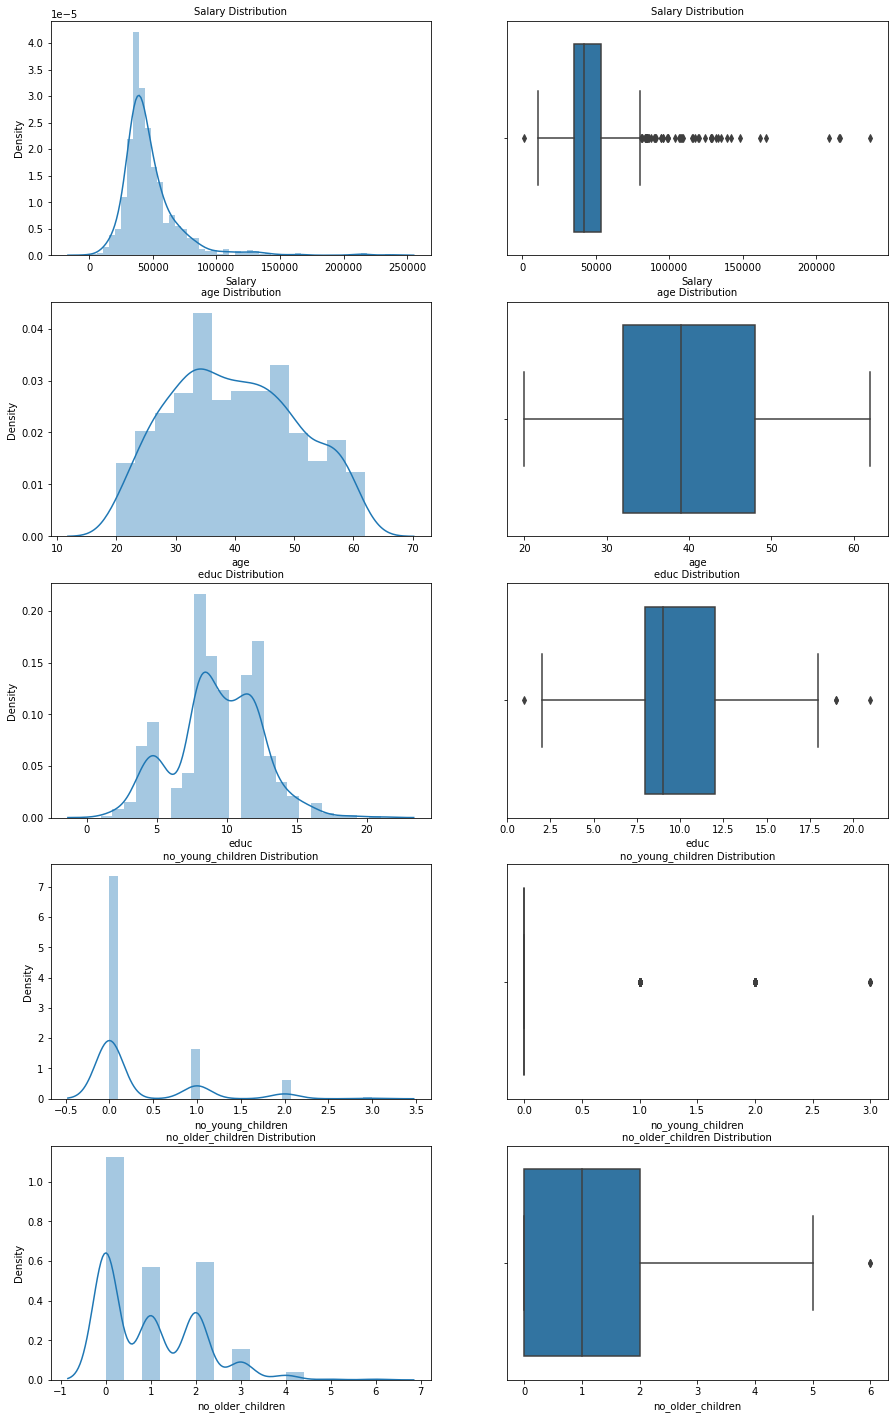

In [79]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 25)

a = sns.distplot(df1['Salary'], ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=10)
a = sns.boxplot(df1['Salary'], orient = "v" , ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=10)

a = sns.distplot(df1['age'], ax=axes[1][0])
a.set_title("age Distribution",fontsize=10)
a = sns.boxplot(df1['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=10)

a = sns.distplot(df1['educ'], ax=axes[2][0])
a.set_title("educ Distribution",fontsize=10)
a = sns.boxplot(df1['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Distribution",fontsize=10)

a = sns.distplot(df1['no_young_children'], ax=axes[3][0])
a.set_title("no_young_children Distribution",fontsize=10)
a = sns.boxplot(df1['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.distplot(df1['no_older_children'], ax=axes[4][0])
a.set_title("no_older_children Distribution",fontsize=10)
a = sns.boxplot(df1['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children Distribution",fontsize=10)

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

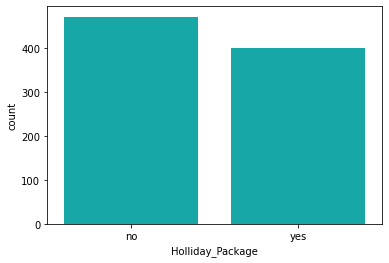

In [80]:
sns.countplot(x="Holliday_Package", data=df1, color="c")

<AxesSubplot:xlabel='foreign', ylabel='count'>

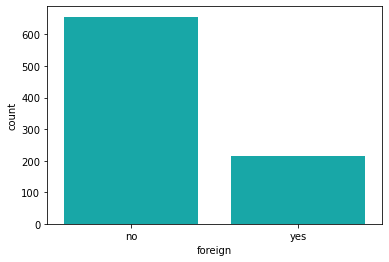

In [81]:
sns.countplot(x="foreign", data=df1, color="c")

### Bivariate Analysis

<AxesSubplot:xlabel='age', ylabel='Salary'>

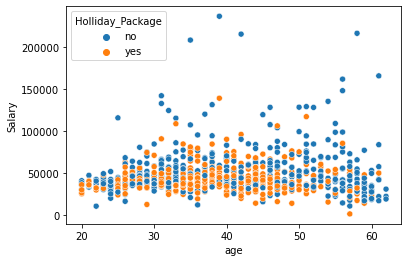

In [82]:
sns.scatterplot(data = df1, x='age',y='Salary', hue = 'Holliday_Package')

<AxesSubplot:xlabel='age', ylabel='Salary'>

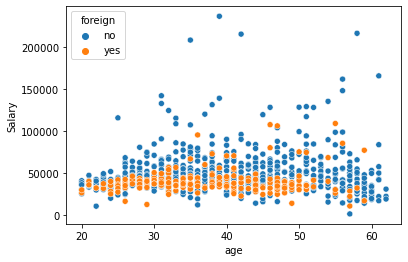

In [83]:
sns.scatterplot(data = df1, x='age',y='Salary', hue = 'foreign')

In [84]:
df1.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

### Multivariate Analysis

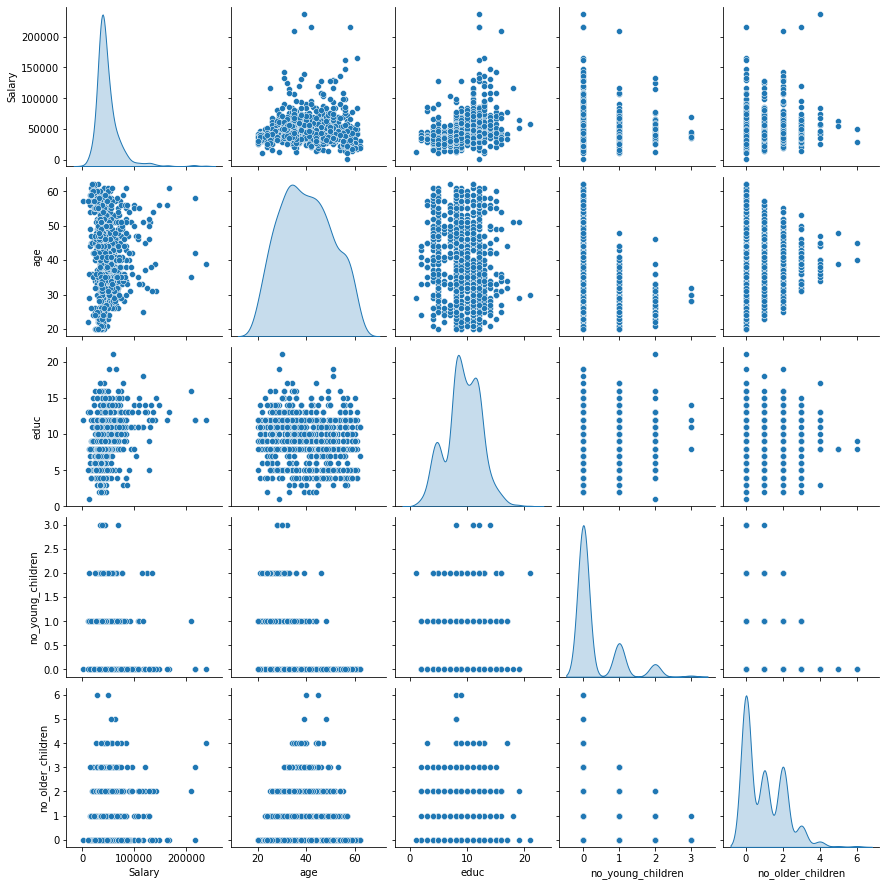

In [85]:
sns.pairplot(df1, diag_kind='kde')

In [86]:
df1.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


<AxesSubplot:>

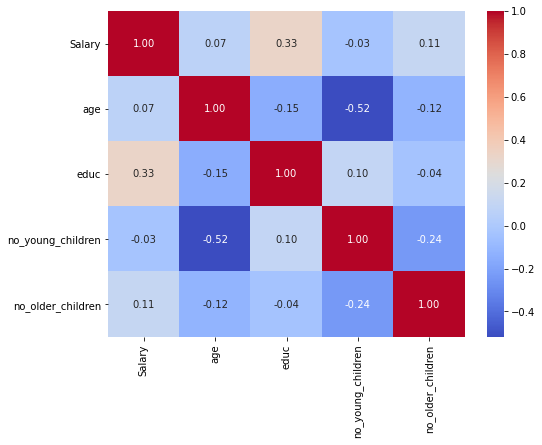

In [87]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True, fmt = '.2f', cmap='coolwarm')

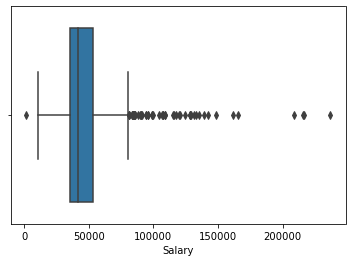

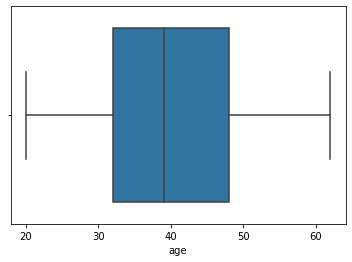

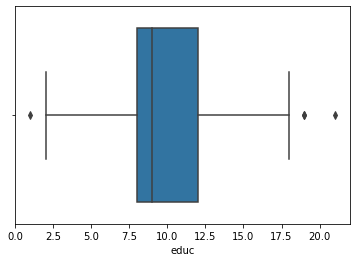

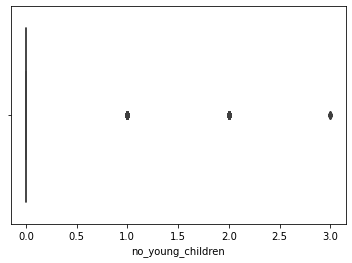

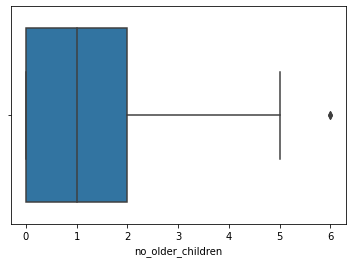

In [88]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(df1[i])
    plt.show()

In [89]:
cont=df1.dtypes[(df1.dtypes!='uint8') & (df1.dtypes!='object')].index

In [90]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [91]:
for column in df1[cont].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

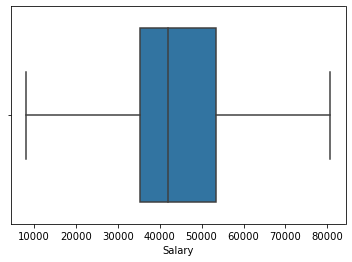

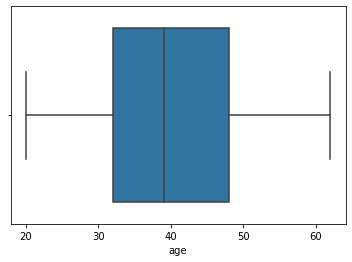

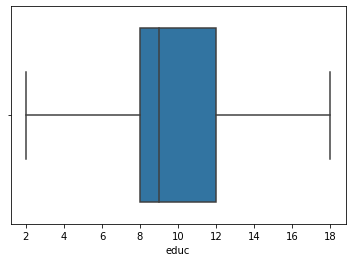

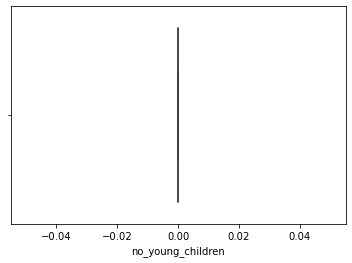

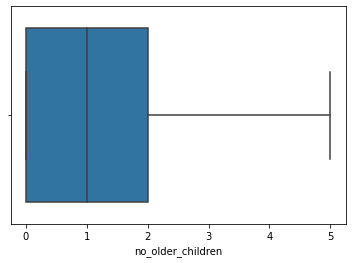

In [92]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(df1[i])
    plt.show()

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [93]:
### Converting categorical to dummy variables in data
df1 = pd.get_dummies(df1, columns=['Holliday_Package','foreign'], drop_first = True)

In [94]:
df1.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [95]:
df1.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

In [96]:
# Copy all the predictor variables into X dataframe
x = df1.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
Y = df1['Holliday_Package_yes']

In [97]:
# Split X and y into training and test set in 70:30 ratio
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.30 , random_state=1,stratify=Y)

In [98]:
print(x_train.shape)
print(Y_train.shape)

(610, 6)
(610,)


In [99]:
Y_train.value_counts()

0    329
1    281
Name: Holliday_Package_yes, dtype: int64

In [100]:
### Applying GridSearchCV for Logistic Regression
grid={'penalty':['l1','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}
model = LogisticRegression(max_iter=100000,n_jobs=2)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
grid_search.fit(x_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [101]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear')


In [102]:
best_model = grid_search.best_estimator_

### Linear Discriminant Analysis Model

In [103]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(x_train,Y_train)

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

#### Performance metrics of Logistic Regression Model

In [104]:
# Prediction on the training and testing set

Ytrain_predict = best_model.predict(x_train)
Ytest_predict = best_model.predict(x_test)

In [105]:
Ytrain_predict

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [106]:
## Getting the probabilities on the train set

Ytrain_predict_prob=best_model.predict_proba(x_train)
pd.DataFrame(Ytrain_predict_prob).head()

,0,1
0,0.262469,0.737531
1,0.365315,0.634685
2,0.550329,0.449671
3,0.323727,0.676273
4,0.346609,0.653391


In [107]:
# Accuracy - Training Data
best_model.score(x_train, Y_train)

0.6278688524590164

In [108]:
## Getting the probabilities on the test set

Ytest_predict_prob=best_model.predict_proba(x_test)
pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.635453,0.364547
1,0.586907,0.413093
2,0.649465,0.350535
3,0.579149,0.420851
4,0.537402,0.462598


In [109]:
# Accuracy - Testing Data
best_model.score(x_test, Y_test)

0.6564885496183206

              precision    recall  f1-score   support

           0       0.62      0.79      0.70       329
           1       0.64      0.43      0.52       281

    accuracy                           0.63       610
   macro avg       0.63      0.61      0.61       610
weighted avg       0.63      0.63      0.61       610
 



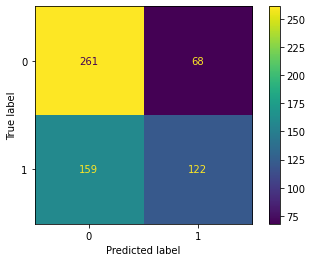

In [110]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,x_train,Y_train)
print(classification_report(Y_train, Ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



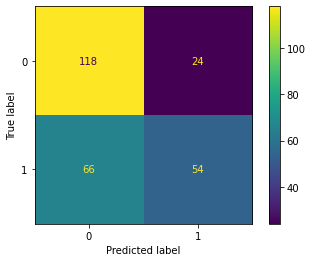

In [111]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,x_test,Y_test)
print(classification_report(Y_test, Ytest_predict),'\n');

AUC: 0.662


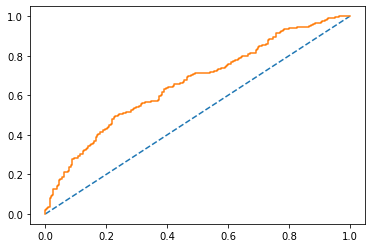

In [112]:
### AUC and ROC for the training data
# predict probabilities
probs = best_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.675


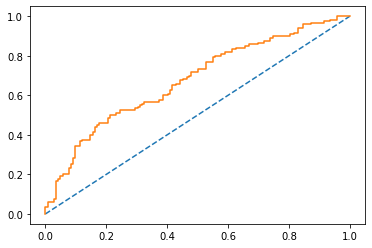

In [113]:
### AUC and ROC for the testing data
# predict probabilities
probs = best_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Performance metrics of Linear Discriminant Analysis

In [114]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = lda_model.predict(x_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = lda_model.predict(x_test)

In [115]:
pred_class_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=uint8)

In [116]:
# Training Data Probability Prediction
pred_prob_train = lda_model.predict_proba(x_train)
pd.DataFrame(pred_prob_train).head()

,0,1
0,0.263852,0.736148
1,0.350635,0.649365
2,0.547033,0.452967
3,0.321572,0.678428
4,0.330963,0.669037


In [117]:
# Accuracy - Training Data
lda_model.score(x_train, Y_train)

0.6327868852459017

In [118]:
# Test Data Probability Prediction
pred_prob_test = lda_model.predict_proba(x_test)
pd.DataFrame(pred_prob_test).head()

,0,1
0,0.644519,0.355481
1,0.574252,0.425748
2,0.658803,0.341197
3,0.567407,0.432593
4,0.542866,0.457134


In [119]:
# Accuracy - Testing Data
lda_model.score(x_test, Y_test)

0.6564885496183206

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610
 



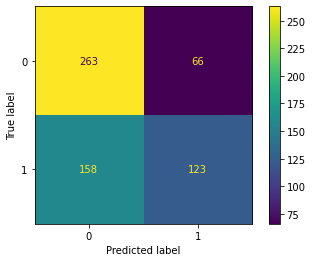

In [120]:
## Confusion matrix on the training data

plot_confusion_matrix(lda_model,x_train,Y_train)
print(classification_report(Y_train, pred_class_train),'\n');

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



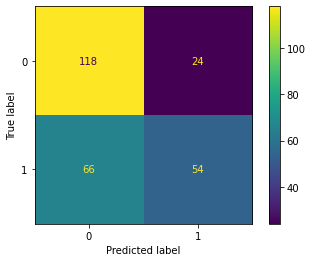

In [121]:
## Confusion matrix on the training data

plot_confusion_matrix(lda_model,x_test,Y_test)
print(classification_report(Y_test, pred_class_test),'\n');

AUC for the Training Data: 0.661


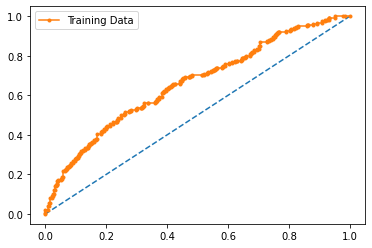

In [122]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.675


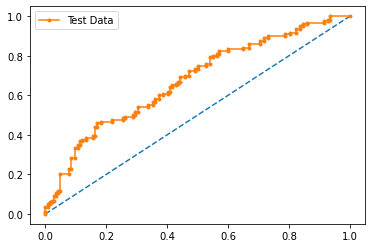

In [123]:
# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Change cutoff point to improve result of model prediction

In [124]:
for j in np.arange(0.1, 1, 0.1):
    
    custom_prob=j
    custom_cuttoff_data=[]
    
    for i in range(0, len(Y_train)):
        
        if np.array(pred_prob_train[:,1])[i] > custom_prob:
            a=1
        else:
            a=0
            
        custom_cuttoff_data.append(a)
    
    print(round(j, 3), '\n')
    
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cuttoff_data),4))
    print('f1_score', round( metrics.f1_score(Y_train,custom_cuttoff_data), 4), '\n')

0.1 

Accuracy Score 0.4607
f1_score 0.6308 

0.2 

Accuracy Score 0.4738
f1_score 0.6365 

0.3 

Accuracy Score 0.5344
f1_score 0.6485 

0.4 

Accuracy Score 0.5787
f1_score 0.6088 

0.5 

Accuracy Score 0.6328
f1_score 0.5234 

0.6 

Accuracy Score 0.6213
f1_score 0.446 

0.7 

Accuracy Score 0.5869
f1_score 0.2455 

0.8 

Accuracy Score 0.541
f1_score 0.0071 

0.9 

Accuracy Score 0.5393
f1_score 0.0 



In [125]:
#predicting on test data by using 0.2 cutoff

data_pred_custom_cutoff=[]

for i in range(0, len(pred_prob_test[:,1])):
    
    if np.array(pred_prob_test[:,1])[i] > 0.2:
        a=1
    else:
        a=0
        
    data_pred_custom_cutoff.append(a)

In [126]:
metrics.accuracy_score(Y_test,data_pred_custom_cutoff)

0.4770992366412214

In [127]:
metrics.roc_auc_score(Y_test,data_pred_custom_cutoff)

0.5176056338028169

In [128]:
metrics.confusion_matrix(Y_test, data_pred_custom_cutoff)

array([[  5, 137],
       [  0, 120]], dtype=int64)

In [129]:
print(metrics.classification_report(Y_test, data_pred_custom_cutoff))

              precision    recall  f1-score   support

           0       1.00      0.04      0.07       142
           1       0.47      1.00      0.64       120

    accuracy                           0.48       262
   macro avg       0.73      0.52      0.35       262
weighted avg       0.76      0.48      0.33       262



In [130]:
data = [[0.63,0.67,0.63,0.66,0.48],[0.65,0.69,0.65,0.69,0.47],[0.43,0.45,0.44,0.45,1.00],[0.66,0.68,0.66,0.68,0.52],[0.52,0.55,0.52,0.55,0.64]]

In [131]:
cf = pd.DataFrame(data, columns = ['Log Reg Train','Log Reg Test','Lda Train','Lda Test','custom cutoff'], index=['accuracy','precision','recall','auc_roc_score','f1score',])
cf 

,Log Reg Train,Log Reg Test,Lda Train,Lda Test,custom cutoff
accuracy,0.63,0.67,0.63,0.66,0.48
precision,0.65,0.69,0.65,0.69,0.47
recall,0.43,0.45,0.44,0.45,1.00
auc_roc_score,0.66,0.68,0.66,0.68,0.52
f1score,0.52,0.55,0.52,0.55,0.64


                                                      The End